-126.821982,-93.447,-88.447,-83.447,-78.446982,-73.447,-68.447,-63.447,-50.821982,C,E,F,D,A



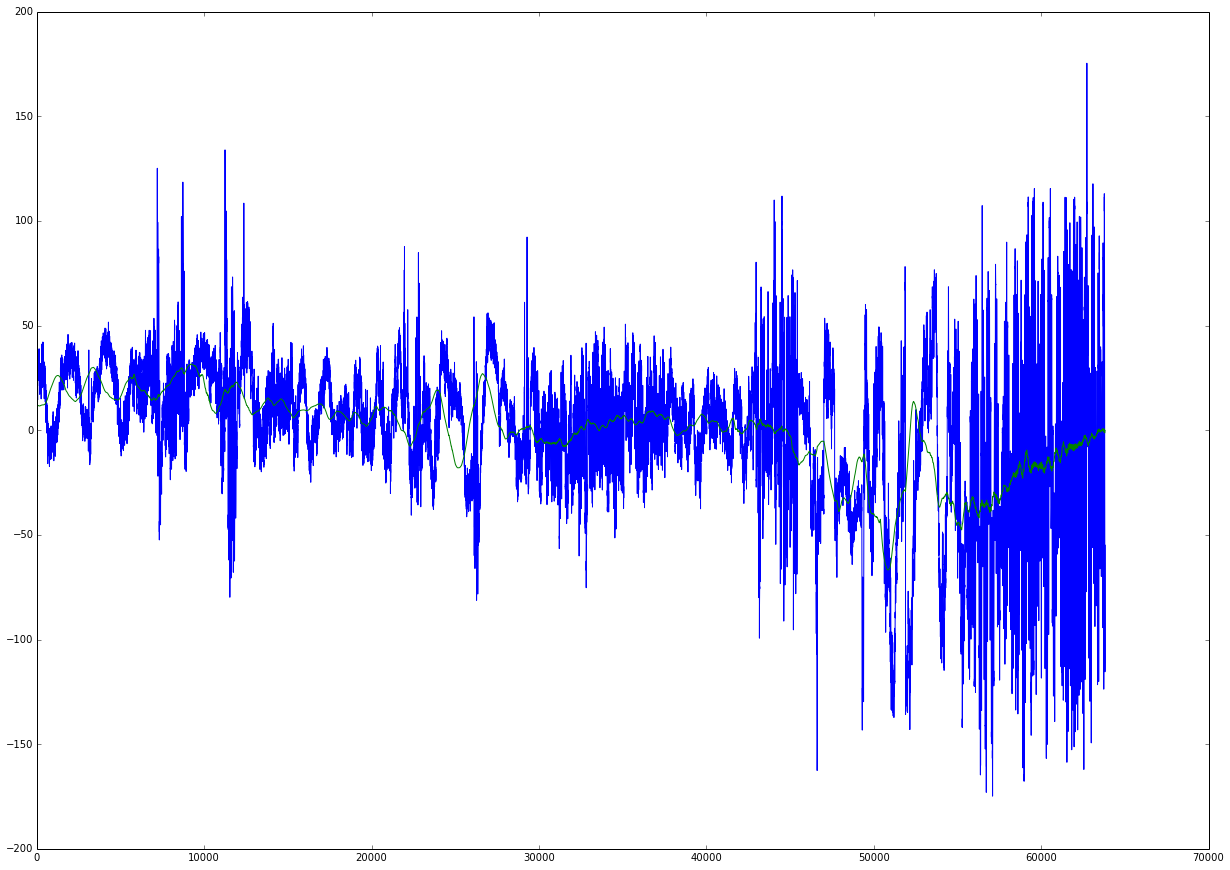

In [62]:
import math as math
import numpy as np
import matplotlib.pyplot as plt
from decimal import *
%matplotlib inline



def getLines(fileName):
    lines=[]
    with open(fileName,'r') as f:
        line = 'greg'
        for i in range (0):
            f.readline()
        line = f.readline()
        while line != '':
            lines.append(line)
            line = f.readline()
    return lines





def dawsonFunc(BzVal,z,coefs):
    A = coefs[0]
    F = coefs[1]
    C = coefs[2]
    E = coefs[3]
    D = coefs[4]
    return A*math.exp(-F*((z-C)**2))*math.erf(D*(z-E))


def plotBz(fileLines):
    theoryVals = []
    realVals = []
    zs = []
    for i in range(len(fileLines)):
        z=int(float((fileLines[i].split(',')[2])))
        RVal = float((fileLines[i].split(',')[3]))
        Tval = dawsonFunc(z,coefs)
        theoryVals.append(Tval)
        realVals.append(RVal*10000)
    plt.rcParams['figure.figsize'] = (21,15)
    plt.plot(theoryVals)
    plt.plot(realVals)
    plt.ylabel('Bz')
    plt.xlabel('z')
    
    

# define coefficients
A=-23995.7374
F=.007543
C=-74.513572
E=-76.265535
D=.00083
z=-93.447

coefs = [A,F,C,E,D]


def getLoss(line):
    zVals = [-126.821982,-93.447,-88.447,-83.447,-78.446982,-73.447,-68.447,-63.447,-50.821982]
    lineArray = line.split(',')
    lineArray = [float(i) for i in lineArray]
    errorTotal = 0
    errors = []
    for i in range(len(zVals)):
        dval = dawsonFunc(2,zVals[i],coefs)
        dError = abs(abs(lineArray[i]) - dval)
        errorTotal += dError
        errors.append(dError)
    return errorTotal, errors


dawsonLines = getLines('DawsonCoeffs.csv')
print(dawsonLines[0])




def getCoefArrays(fileLinesArray):
    As = []
    Cs = []
    Fs = []
    Es = []
    Ds = []
    for i in range(len(fileLinesArray)):
        line = fileLinesArray[i]
        lineArray = line.split(',')
        lineArray = [float(i) for i in lineArray]
        Cs.append(lineArray[9])
        Es.append(lineArray[10])
        Fs.append(lineArray[11])
        Ds.append(lineArray[12])
        As.append(lineArray[8])
    return Cs, Es, Fs, Ds, As
        
        
Cs, Es, Fs, Ds, As = getCoefArrays(dawsonLines[1:])


plt.rcParams['figure.figsize'] = (21,15)
plt.plot(As[:])

def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

ma = runningMeanFast(As,1500)
plt.plot(ma)


In [ ]:
# plt.rcParams['figure.figsize'] = (15,10)
# plt.plot(deltas)
# plt.ylabel('Delta')
# plt.show()

# plt.plot(mefBzSide)
# plt.ylabel('SideArc')
# plt.show()

# plt.plot(mefBzBottom)
# plt.ylabel('BottomArc')
# plt.show()